## Exploratory Data Analysis  - 
### Mahindra First Choice Services

Mahindra First Choice Services (MFCS) is a company of Mahindra Group and is India’s leading
chain of multi-brand car workshops with over 335+ workshops present in 267+ towns & 24
states. It has serviced over 10,50,000 cars. The company aims to establish countrywide network
of over 400 workshops by March 2018.

Geolocation Based Customer Analysis:
The idea is to explore how various factors like car make & model, time and type of service etc.
vary with location. Since the servicing industry is local in nature, this kind of an analysis could
possibly render some really interesting business insights.

## Problem Statement 1 -- Visualization

### 1.1 To Study Customer type/segmentation

>>>1. Commom Marketing Source
>>>2. Revenue generated by Car Make company and models & Top Car Models being serviced
>>>3. Revenue generated based on each type of service taken or spending amount & Contribution Percentage of each service type
>>>4. Make-wise (Profit)Revenue to Time ratio for each service.
>>>5. State wise understanding of car ownership

 
### 1.2 For Inventory Management studying Seasonal Requirement

>>>1. Monthly demand of Service type or material type & Which Monthly and Yearly revenue trends.
>>>2. Statewise study of demand in material or service
>>>3. Combine 1 & 2 to understand what materials and services are more required in which state and in which season 


### 1.3 Marketing recommendations
>>>1. Top Insurance Companies
>>>2. Which marketing activity attracts most customers
>>>3. Cost distribution study for highest & lowest revenue generating marketing resources 


## Problem Statement 2 - Machine Learning

### 2.1 Clustering for Revenue generated from different Car Models(final invoice)

### 2.2 Clustering based on Customers(final invoice

In [1]:
# Importing required libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import iplot, init_notebook_mode
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Loading the invoice data
df_invoice = pd.read_csv("Final_invoice.csv")
df_invoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [4]:
# Function to identify numeric features

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df_invoice)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df_invoice)
print("Categorical Features:")
print(categorical_columns)

# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    return dataset.dtypes


check_datatypes(df_invoice)

Numeric Features:
   Unnamed: 0  Amt Rcvd From Custom  Amt Rcvd From Ins Co  CGST(14%)  \
0           0                   0.0                   0.0        0.0   
1           1                   0.0                   0.0        0.0   
2           2                   0.0                   0.0        0.0   
3           3                   0.0                   0.0        0.0   
4           4                   0.0                   0.0        0.0   

   CGST(2.5%)  CGST(6%)  CGST(9%)  IGST(12%)  IGST(18%)  IGST(28%)  IGST(5%)  \
0         0.0       0.0       0.0        0.0        0.0        0.0       0.0   
1         0.0       0.0       0.0        0.0        0.0        0.0       0.0   
2         0.0       0.0       0.0        0.0        0.0        0.0       0.0   
3         0.0       0.0       0.0        0.0        0.0        0.0       0.0   
4         0.0       0.0       0.0        0.0        0.0        0.0       0.0   

   Invoice No  Job Card No  KMs Reading  Labour Total  Misc Total  \

Unnamed: 0                int64
Amt Rcvd From Custom    float64
Amt Rcvd From Ins Co    float64
Area / Locality          object
CGST(14%)               float64
CGST(2.5%)              float64
CGST(6%)                float64
CGST(9%)                float64
CITY                     object
Cash /Cashless Type      object
Claim No.                object
Cust Type                object
Customer No.             object
District                 object
Expiry Date              object
Gate Pass Date           object
Gate Pass Time           object
IGST(12%)               float64
IGST(18%)               float64
IGST(28%)               float64
IGST(5%)                float64
Insurance Company        object
Invoice Date             object
Invoice No                int64
Invoice Time             object
Job Card No               int64
JobCard Date             object
JobCard Time             object
KMs Reading               int64
Labour Total            float64
Make                     object
Misc Tot

In [5]:
# Checking missing data in the dataset
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data = missing_data(df_invoice)
print(missing_data)

                       Total     Percent
Service Advisor Name  492314  100.000000
Claim No.             487510   99.024200
Policy no.            475432   96.570888
Expiry Date           470083   95.484386
Insurance Company     468723   95.208140
Cash /Cashless Type   464894   94.430384
Gate Pass Date        451399   91.689247
Technician Name       236834   48.106290
IGST(18%)             197286   40.073205
IGST(12%)             197286   40.073205
Total Value           197286   40.073205
CGST(14%)             197286   40.073205
ODN No.               197286   40.073205
Outstanding Amt       197286   40.073205
CGST(9%)              197286   40.073205
CGST(6%)              197286   40.073205
IGST(28%)             197286   40.073205
CGST(2.5%)            197286   40.073205
IGST(5%)              197286   40.073205
TDS amount            197286   40.073205
Amt Rcvd From Custom  197286   40.073205
Total SGST/UGST       197286   40.073205
SGST/UGST(14%)        197286   40.073205
Total IGST      

In [6]:
#Copying the invoce dataframe in another dataframe df
df = df_invoice.copy()

# STATE-WISE CAR SERVICE

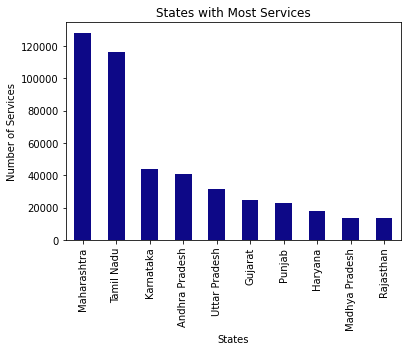

In [7]:
df['District'].value_counts().head(10).plot(kind='bar', colormap='plasma')
plt.title("States with Most Services")
plt.ylabel("Number of Services")
plt.xlabel("States")
plt.show()

In [8]:
### 1. Make (Profit) Revenue to Time ratio for each service.
revenues = ((df.groupby(['Order Type'])['Total Amt Wtd Tax.'].sum())/100000).sort_values(ascending = False)
print ("Revenues in Lacs\n",revenues)

Revenues in Lacs
 Order Type
Accidental           7554.651183
Running Repairs      6787.316028
Paid Service         6451.709450
Mechanical            474.555155
SMC Value Package     350.796805
SMC Redemption         16.742243
WBW Order               1.312780
Repeat Order            0.040067
Workshop Damage         0.000000
Name: Total Amt Wtd Tax., dtype: float64


In [9]:
df['Invoice_DateTime'] = pd.to_datetime(df['Invoice Date'] + ' ' + df['Invoice Time'])

In [10]:
df['JobCard_DateTime'] = pd.to_datetime(df['JobCard Date'] + ' ' + df['JobCard Time'])

In [11]:
df['Service Time']=df['Invoice_DateTime'].sub(df['JobCard_DateTime'], axis=0)

In [12]:
df['Service Hour'] = df['Service Time'].apply(lambda x : (x.days * 24 + x.seconds//3600))

In [13]:
df.groupby(['Plant','CITY','District'])[['Total Amt Wtd Tax.']].mean().sort_values(by=['District'],ascending=False)

Total Amt Wtd Tax.
Plant CITY              District                                
X269  KOLKATA           West Bengal                   839.386667
X270  LALGOLA           West Bengal                   275.680000
      MURSHIDABAD       West Bengal                   131.866667
      RAGHUNATHGANJ     West Bengal                  4914.793333
      ROSHANBAG         West Bengal                  5355.290000
...                                                          ...
X136  ALIAT ROAD JORHAT Andaman and Nico.In.        14539.435000
X064  HISAR             Andaman and Nico.In.          628.130000
X063  ananthapur        Andaman and Nico.In.         3561.250000
X203  PRODDATUR         Andaman and Nico.In.          304.310000
X018  SHIRUR            Andaman and Nico.In.        12820.430000

[28196 rows x 1 columns]

In [14]:
# Service Time in hours

hours = df.groupby(['Order Type'])['Service Hour'].sum()
print ("Service Time in Hours\n",hours)

Service Time in Hours
 Order Type
Accidental           10155823
Mechanical            1283453
Paid Service         11369387
Repeat Order           238821
Running Repairs      16653580
SMC Redemption        1015395
SMC Value Package      102382
WBW Order                2061
Workshop Damage         14847
Name: Service Hour, dtype: int64


In [15]:
# Revenue to Time Ratio
R_H_ratio = ((revenues*100000)/(hours)).sort_values(ascending = False)
R_H_ratio

Order Type
SMC Value Package    342.635234
Accidental            74.387385
WBW Order             63.696288
Paid Service          56.746326
Running Repairs       40.755898
Mechanical            36.974876
SMC Redemption         1.648840
Repeat Order           0.016777
Workshop Damage        0.000000
dtype: float64

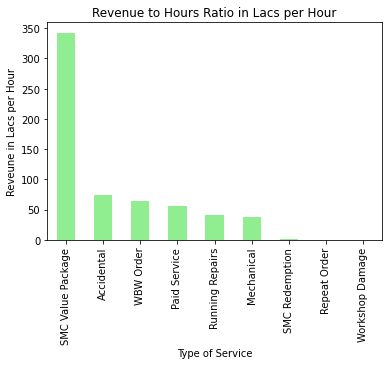

In [16]:
# Graph of Revenue to Hours Ratio in Lacs per Hour

R_H_ratio.plot(kind='bar', color='lightgreen')
plt.title("Revenue to Hours Ratio in Lacs per Hour")
plt.ylabel("Reveune in Lacs per Hour")
plt.xlabel("Type of Service")
plt.show()

In [17]:
# How many are regular repairs and accidental / body work. 
df['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
Workshop Damage          17
WBW Order                17
Name: Order Type, dtype: int64

In [18]:
df['Order Type'].unique()

array(['Paid Service', 'SMC Value Package', 'Running Repairs',
       'SMC Redemption', 'Accidental', 'Repeat Order', 'Workshop Damage',
       'Mechanical', 'WBW Order'], dtype=object)

In [19]:
Accidental_Repairs = sum(df['Order Type'] == "Accidental")
print ("Total number of Accidental repairs are",Accidental_Repairs)

Total number of Accidental repairs are 44159


In [20]:
Total_Repairs = df['Order Type'].shape[0]
print ("Total number of services are {} which are almost 5 Lacs services.".format(Total_Repairs))


Total number of services are 492314 which are almost 5 Lacs services.


In [21]:
# Percentage are Accidental repairs of the overall services.

print ("Percentage of Accidental Repairs is {0:.2f}%".format((Accidental_Repairs/Total_Repairs)*100))


Percentage of Accidental Repairs is 8.97%


## Most number of order type

<AxesSubplot:ylabel='Order Type'>

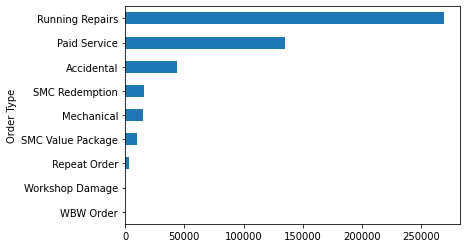

In [22]:
df_invoice.groupby('Order Type')['Job Card No'].count().sort_values(ascending=True).plot(kind='barh')


In [23]:
data_maha = df_invoice[df_invoice['District']=='Maharashtra']
data_maha.groupby(['Plant Name1','Order Type'])[['Job Card No']].count().sort_values(by=['Plant Name1','Job Card No'],ascending=False)#.unstack().plot(kind='bar',stacked=True)

Job Card No
Plant Name1             Order Type                  
YESHWANTPUR - BANGALORE Running Repairs            5
                        Accidental                 3
                        Mechanical                 1
                        SMC Redemption             1
X444 - SAI AUTO SERVICE Running Repairs          121
...                                              ...
ANDHERI                 Repeat Order               7
                        Workshop Damage            1
AMBATTUR - CHENNAI      Accidental                 4
                        Running Repairs            4
                        Paid Service               3

[400 rows x 1 columns]

# Insight :	Marketing/Sales Recommendation

### 1.	Most revenue generating service type

We analysed the type of services and found that the most of the revenue generating service is 'Accidental' followed by 'Running Repairs' and 'Paid services'. We have a good percentage of Accidental Repairs as we do not want to block workshop bay for a long time as accidental repairs take time however since they are high value repairs we do not want to just pass them on.

* Also customer who came in for an accidental repair may later on come in for regular repairs as well therefore we are in sweet spot with our accidental repairs.

* Further if we analyse the time taken for each services we found that the SMC Value Package generates more revenue in lesser time period than any other. It generates 342 L per hour.2nd highest revenue generation service with lesser service time is Accidental 74 L per hour, followed by WBW order 63 L per hour though the number of order is less but it is done in short time period whereas the running repairs and Paid Services generates more revenue but takes longer time period of service.

### Recommendation:
SMC value package and WBW services have fewer orders but create more revenue, we can focus on increasing the sales of SMC package & WBW (Marketing/Sales Recommendation)


### 2. What type of customers give the highest amount of repairs.

In [24]:
Total = df['Total Amt Wtd Tax.'].sum()
print ("Total Amount Spent in Servicing including Taxes is {} which is more than 216 Crore Rupees.".format(Total))

Total Amount Spent in Servicing including Taxes is 2163712371.2599998 which is more than 216 Crore Rupees.


In [25]:
#Type of customers avaliable
df['Cust Type'].unique()

array(['Retail', 'Corporate others', 'Corporate- M&M', 'Fleets', 'MFCWL',
       'Insurance', 'Franchise'], dtype=object)

In [26]:
#Printing the reveune generation from each type of customers
print ("Total Revenue from different Customers type in Percentage\n",(df.groupby(['Cust Type'], sort=False)['Total Amt Wtd Tax.'].sum()/Total*100))

Total Revenue from different Customers type in Percentage
 Cust Type
Retail              99.034938
Corporate others     0.211867
Corporate- M&M       0.133183
Fleets               0.577408
MFCWL                0.040209
Insurance            0.000196
Franchise            0.002198
Name: Total Amt Wtd Tax., dtype: float64


## Insight : Type of Customers

As we can see that 99% are from retail customers. It is quite clear from above that almost all are of our customers are Retail customers. Hence we should be primarily focusing on them.

### Recommendation: 

* Any special discounts or offers for customers of other segments is simply not justified as the amount of servicing done by them itself is very low. Hence they should not be given any special priority.

* Amount of Fleet services are also very low which can be attributed to the sparse presence of MFCS Workshop and the multiple options available in Tier 1 Urban areas such as Mumbai, Delhi, Bangalore, Chennai, Kolkata, Hyderabad, Pune. Although Kolkata, Pune, Chennai and Bangalore have 22 workshops among them, it is simply not enough to satisfy the high demand of these Urban locations resulting in Fleet operators staying away from our Workshops.¶

* Also if we can get the information on data origin (marketing source) of customers we can focus on target marketing for them and proper distribution of marketing cost for them.


### Top Car Models being serviced 

In [27]:
df['Model'].value_counts(ascending=False).head(15)

SWIFT           31899
ALTO            28569
SANTRO          24536
SCORPIO CRDE    23771
WAGONR          22864
I10             21892
INDICA          19810
SWIFT DZIRE     16004
BOLERO          15909
XYLO            13346
I20             12896
INNOVA          11470
CITY            10665
VISTA           10341
INDIGO          10337
Name: Model, dtype: int64

In [28]:
df['Model'].value_counts(ascending=True).tail(15).index

Index(['INDIGO', 'VISTA', 'CITY', 'INNOVA', 'I20', 'XYLO', 'BOLERO',
       'SWIFT DZIRE', 'INDICA', 'I10', 'WAGONR', 'SCORPIO CRDE', 'SANTRO',
       'ALTO', 'SWIFT'],
      dtype='object')

In [29]:
models = df['Model'].value_counts(ascending=True).tail(15).index
y_pos = np.arange(len(models))
models_nos = df['Model'].value_counts(ascending=True).tail(15)

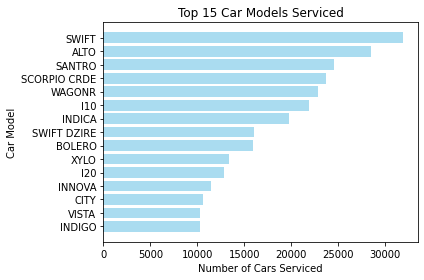

In [30]:
# Top 15 car models serviced

plt.barh(y_pos, models_nos, align='center', alpha=0.7, color='skyblue')
plt.title("Top 15 Car Models Serviced")
plt.yticks(y_pos, models)
plt.ylabel("Car Model")
plt.xlabel("Number of Cars Serviced")
plt.tight_layout()
plt.show()

In [31]:
# Revenue from Each Model/Make Type

make_model_revenue = df.groupby(['Make', 'Model'], sort=False)['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).head(20)
print (make_model_revenue/100000)

Make                  Model       
MAHINDRA &  MAHINDRA  SCORPIO CRDE    1616.329199
MARUTI SUZUKI         SWIFT           1240.543570
MAHINDRA &  MAHINDRA  BOLERO          1025.053716
                      XYLO             889.779423
MARUTI SUZUKI         ALTO             817.960083
HYUNDAI               SANTRO           814.883494
TATA MOTORS           INDICA           787.717376
HYUNDAI               I10              727.583811
TOYOTA                INNOVA           688.785515
MARUTI SUZUKI         WAGONR           668.176658
                      SWIFT DZIRE      637.993557
HYUNDAI               I20              526.402510
MAHINDRA &  MAHINDRA  LOGAN D          492.616437
HONDA                 CITY             484.954436
TATA MOTORS           INDIGO           476.762067
                      VISTA            443.494162
HYUNDAI               VERNA            440.408860
FORD                  FIESTA           371.283001
                      FIGO             340.668159
MAHINDRA &  MAH

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '(MAHINDRA &  MAHINDRA, SCORPIO CRDE)'),
  Text(1, 0, '(MARUTI SUZUKI, SWIFT)'),
  Text(2, 0, '(MAHINDRA &  MAHINDRA, BOLERO)'),
  Text(3, 0, '(MAHINDRA &  MAHINDRA, XYLO)'),
  Text(4, 0, '(MARUTI SUZUKI, ALTO)'),
  Text(5, 0, '(HYUNDAI, SANTRO)'),
  Text(6, 0, '(TATA MOTORS, INDICA)'),
  Text(7, 0, '(HYUNDAI, I10)'),
  Text(8, 0, '(TOYOTA, INNOVA)'),
  Text(9, 0, '(MARUTI SUZUKI, WAGONR)'),
  Text(10, 0, '(MARUTI SUZUKI, SWIFT DZIRE)'),
  Text(11, 0, '(HYUNDAI, I20)'),
  Text(12, 0, '(MAHINDRA &  MAHINDRA, LOGAN D)'),
  Text(13, 0, '(HONDA, CITY)'),
  Text(14, 0, '(TATA MOTORS, INDIGO)'),
  Text(15, 0, '(TATA MOTORS, VISTA)'),
  Text(16, 0, '(HYUNDAI, VERNA)'),
  Text(17, 0, '(FORD, FIESTA)'),
  Text(18, 0, '(FORD, FIGO)'),
  Text(19, 0, '(MAHINDRA &  MAHINDRA, VERITO)')])

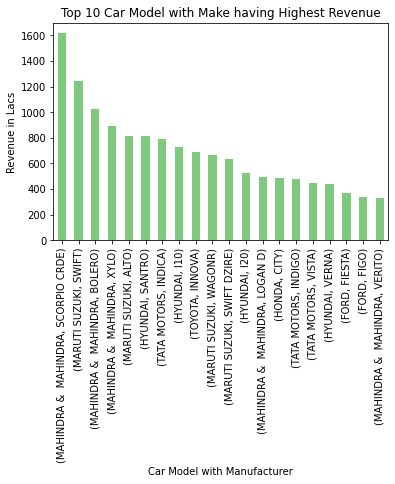

In [32]:
# Top 10 Car Model with Make company having Highest Revenue

(make_model_revenue/100000).plot(kind='bar', colormap = 'Accent')
plt.title("Top 10 Car Model with Make having Highest Revenue")
plt.ylabel("Revenue in Lacs")
plt.xlabel("Car Model with Manufacturer")
plt.xticks(rotation=90)


In [33]:
print (df.groupby(['Model'], sort=False)['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).head(10))

Model
SCORPIO CRDE    1.616329e+08
SWIFT           1.240544e+08
BOLERO          1.025054e+08
XYLO            8.897794e+07
ALTO            8.179704e+07
SANTRO          8.148835e+07
INDICA          7.877174e+07
I10             7.275838e+07
INNOVA          6.887855e+07
WAGONR          6.681767e+07
Name: Total Amt Wtd Tax., dtype: float64


In [34]:
print (df.groupby(['Make'], sort=False)['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).head(10))

Make
MAHINDRA &  MAHINDRA    5.724595e+08
MARUTI SUZUKI           4.726129e+08
HYUNDAI                 3.143035e+08
TATA MOTORS             2.513154e+08
GENERAL MOTORS          1.305022e+08
TOYOTA                  1.100189e+08
FORD                    9.734373e+07
HONDA                   6.870421e+07
SKODA                   3.940137e+07
FIAT                    3.067919e+07
Name: Total Amt Wtd Tax., dtype: float64


In [35]:
# Revenue generate from Make
pd.options.display.float_format = '{:.2f}'.format
Brands = df_invoice.groupby('Make')['Total Value'].sum().sort_values(ascending=False)
print('Revenue generate from Make :\n\n', Brands[0:20])


Revenue generate from Make :

 Make
MAHINDRA &  MAHINDRA   346520590.82
MARUTI SUZUKI          286944641.99
HYUNDAI                204326010.39
TATA MOTORS            157169291.71
GENERAL MOTORS          74353756.41
TOYOTA                  60324411.17
FORD                    59323729.10
HONDA                   43742099.77
SKODA                   22123055.16
FIAT                    18102316.33
VOLKSWAGEN              13273854.64
NISSAN                   5036919.92
RENAULT                  4343420.67
MITSUBISHI MOTORS        3975841.08
DAEWOO                    974701.98
BMW                       832655.02
MERCEDES BENZ             790413.22
AUDI                      368236.51
FORCE                     363804.86
HINDUSTAN MOTORS          253174.13
Name: Total Value, dtype: float64


In [36]:
df_invoice.groupby('Make')['Total Value'].mean().sort_values(ascending=False)

Make
LAND ROVER             9238.35
MERCEDES BENZ          6813.91
MAHINDRA &  MAHINDRA   6638.45
BMW                    6608.37
SKODA                  5812.68
TOYOTA                 5679.20
MITSUBISHI MOTORS      5058.32
FORCE                  4983.63
FIAT                   4630.93
TATA MOTORS            4554.31
FORD                   4507.88
HONDA                  4449.40
VOLKSWAGEN             4319.51
PREMIER AUTOMOBILES    4287.05
GENERAL MOTORS         4212.68
RENAULT                3977.49
AUDI                   3917.41
PORCHE                 3847.97
HYUNDAI                3740.59
NISSAN                 3695.47
DAEWOO                 3456.39
MARUTI SUZUKI          3277.98
HINDUSTAN MOTORS       2978.52
VOLVO                  2438.21
SONALIKA               2055.35
SAN MOTORS              450.38
MORRIS                  353.16
JEEP                    178.66
Name: Total Value, dtype: float64

In [37]:
df_invoice.groupby('Make')['Total Value'].count().sort_values(ascending=False)

Make
MARUTI SUZUKI           87537
HYUNDAI                 54624
MAHINDRA &  MAHINDRA    52199
TATA MOTORS             34510
GENERAL MOTORS          17650
FORD                    13160
TOYOTA                  10622
HONDA                    9831
FIAT                     3909
SKODA                    3806
VOLKSWAGEN               3073
NISSAN                   1363
RENAULT                  1092
MITSUBISHI MOTORS         786
DAEWOO                    282
BMW                       126
MERCEDES BENZ             116
AUDI                       94
HINDUSTAN MOTORS           85
FORCE                      73
PREMIER AUTOMOBILES        40
SONALIKA                   26
VOLVO                      10
LAND ROVER                  7
PORCHE                      3
JEEP                        2
MORRIS                      1
SAN MOTORS                  1
Name: Total Value, dtype: int64

Revenue generate from Model :

 Model
SCORPIO CRDE   106436433.39
SWIFT           72493786.20
SANTRO          60230170.62
XYLO            59588206.53
INDICA          53362958.83
ALTO            51608409.80
BOLERO          48248691.11
I10             46791672.25
WAGONR          45967477.12
INNOVA          38419134.67
LOGAN D         37469776.76
CITY            33399848.32
SWIFT DZIRE     32078680.06
INDIGO          30312743.52
I20             30117146.88
VISTA           27149321.29
VERNA           26367671.80
FIESTA          24916625.96
LOGAN P         24330386.60
VERITO          20927684.70
Name: Total Value, dtype: float64


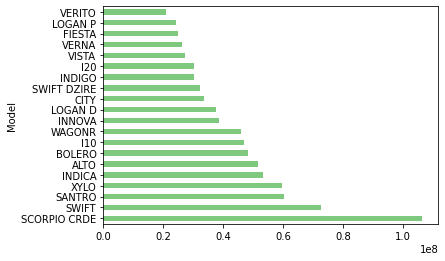

In [38]:
# Revenue generate from Model
pd.options.display.float_format = '{:.2f}'.format
car = df_invoice.groupby('Model')['Total Value'].sum().sort_values(ascending=False)
print('Revenue generate from Model :\n\n', car[0:20])
car[:20].plot(x= car.index, y = car, kind = 'barh', colormap = 'Accent');

## Insight : Top car model serviced

Mahindra Scorpio, Maruti Swift, Hyundai Santro, Tata Indica, Mahindra Xylo, Bolero are most serviced cars also generates high revenue.
High end cars like Land Rover, Mercedes Benz, BMW, Audi etc. are less in no to be serviced but still average revenue is more than low end cars. 

Question :data ownership ratio
### Recommendation

* Offers, promotions or programs are needed to attract high end cars more.

* This can help to manage inventory in better way. 


### 5. Which marketing activity attracts most customers.


In [39]:
#Loading Customer data set
df_csd = pd.read_excel(r"Customer_Data.xlsx")
df_csd.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.00,Z001,nan,nan,nan,NaN,NaT
1,32,2,1.00,Z005,nan,nan,nan,NaN,NaT
2,34,4,1.00,Z005,nan,2.00,nan,NaN,NaT
3,35,5,1.00,Z005,nan,nan,nan,NaN,NaT
4,42,7,1.00,Z008,nan,nan,nan,NaN,NaT


In [40]:
#Checking info of the customer data set
df_csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555338 entries, 0 to 555337
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Business Partner  555338 non-null  object        
 1   Customer No.      555338 non-null  object        
 2   Partner Type      555260 non-null  float64       
 3   Data Origin       555202 non-null  object        
 4   Title             509031 non-null  float64       
 5   Marital Status    16037 non-null   float64       
 6   Occupation        14558 non-null   float64       
 7   Date of Birth     13444 non-null   object        
 8   Death date        663 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 38.1+ MB


In [41]:
df_csd['Data Origin'].value_counts()

Z005    149861
Z006    121660
Z001     63237
Z002     38326
Z004     36801
Z019     29780
Z021     28828
Z018     15382
Z013     13967
Z008     12122
Z016      8118
Z011      8023
Z010      6260
Z017      5685
Z003      5082
Z014      4014
Z012      3840
Z007      2069
Z015       745
Z009       735
Z020       590
Z022        77
Name: Data Origin, dtype: int64

In [42]:
marketing_acitivty = []

In [43]:
# Decoding the data origin from sheet 2

df_csd_origin = pd.DataFrame(df_csd['Data Origin'].value_counts())
#df_csd_origin.set_index(['Reference - Customer', 'Reference - Employee', 'Camp - Outdoor', 'Camp - Workshop', 'Fleet', 'Spotted the Outlet', 'Other Outdoor Activity', 'Outdoor Sales Activity', 'Hoardings/Outdoor Advertisements', 'Just Dial/Other Helpline', 'Newspaper AD', 'Float Activity', 'Company Website', 'Newspaper Leaflet', 'Emailers', 'Insurance Company', 'Petrol Pump Activity', 'Reference - Used Car Dealer', 'Television AD', 'Snapdeal/Other Websites', 'Mahindra Sister Concern Employee', 'Radio'])
df_csd_origin.rename(index={'Z005':'Reference - Customer', 'Z006':'Reference - Employee', 'Z001':'Camp - Outdoor', 'Z002':'Camp - Workshop', 'Z004':'Fleet', 'Z019':'Spotted the Outlet', 'Z021':'Other Outdoor Activity', 'Z018':'Outdoor Sales Activity', 'Z013':'Hoardings/Outdoor Advertisements', 'Z008':'Just Dial/Other Helpline', 'Z016':'Newspaper AD', 'Z011':'Float Activity', 'Z010':'Company Website', 'Z017':'Newspaper Leaflet', 'Z003':'Emailers', 'Z014':'Insurance Company', 'Z012':'Petrol Pump Activity', 'Z007':'Reference - Used Car Dealer', 'Z016':'Newspaper AD', 'Z015':'Television AD', 'Z009':'Snapdeal/Other Websites', 'Z020':'Mahindra Sister Concern Employee', 'Z022':'Radio'}, inplace=True)


In [44]:
df_csd_origin.rename(columns={'Data Origin':'Number of Customers'})

,Number of Customers
Reference - Customer,149861
Reference - Employee,121660
Camp - Outdoor,63237
Camp - Workshop,38326
Fleet,36801
Spotted the Outlet,29780
Other Outdoor Activity,28828
Outdoor Sales Activity,15382
Hoardings/Outdoor Advertisements,13967
Just Dial/Other Helpline,12122


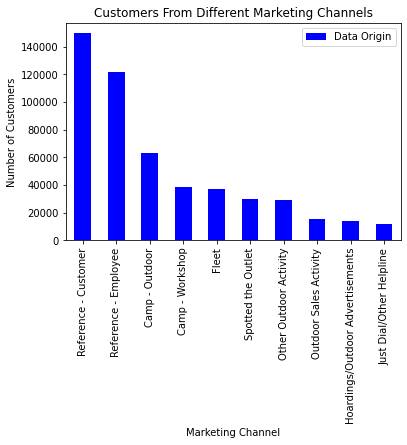

In [45]:
# No. of Customers From Top 10 Different Marketing Channels

df_csd_origin.head(10).plot(kind='bar', color='blue')
plt.title("Customers From Different Marketing Channels")
plt.ylabel("Number of Customers")
plt.xlabel("Marketing Channel")
plt.show()

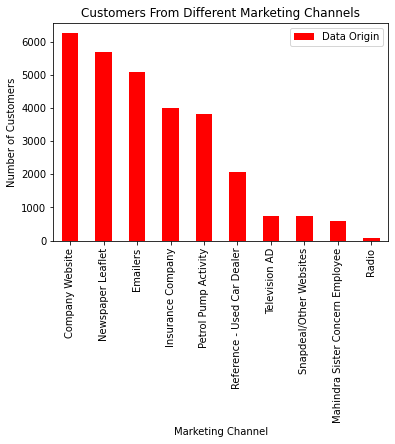

In [46]:
# No. of Customers From Lowest 10 Different Marketing Channels

df_csd_origin.tail(10).plot(kind='bar', color='red')
plt.title("Customers From Different Marketing Channels")
plt.ylabel("Number of Customers")
plt.xlabel("Marketing Channel")
plt.show()

## Insight :	Marketing resources

Here we studied the customer data. We have data origin column which tells about how customer came to MFC. Highest no. of customers has visited MFC through existing customer reference and employee reference.It means customer are happy with the services.


### Recommendation: 

* 1.	Outdoor camps & workshops, fleets also brought significant amount of customers. We can focus more promotional activities on them to increase customers. (Marketing resources)

* 2.	We can see the lowest contributing sources are radio ad, TV ad, snapdeal & other websites, so the cost can be deducted for promotion on these resources OR better promotional activities with offers can be planned to increase the sales.


###  Trends of Monthly and Yearly revenue.


In [47]:
df_months_years = df[['JobCard Date', 'Total Amt Wtd Tax.']]
df_months_years.head()


,JobCard Date,Total Amt Wtd Tax.
0,2014-12-13,4051.95
1,2015-01-02,1001.29
2,2015-01-02,233.14
3,2015-01-03,0.00
4,2015-01-02,2747.12


In [48]:
df_months_years['JobCard_Month'] = pd.DatetimeIndex(df_months_years['JobCard Date']).month
df_months_years['JobCard_Year'] = pd.DatetimeIndex(df_months_years['JobCard Date']).year


#### Create JobCard_month & JObCard_Year columns


In [49]:
df_months_years.head()

,JobCard Date,Total Amt Wtd Tax.,JobCard_Month,JobCard_Year
0,2014-12-13,4051.95,12,2014
1,2015-01-02,1001.29,1,2015
2,2015-01-02,233.14,1,2015
3,2015-01-03,0.00,1,2015
4,2015-01-02,2747.12,1,2015


In [50]:
#Getting the month of the service done

import calendar
df_months_years['JobCard_Month'] = df_months_years['JobCard_Month'].apply(lambda x: calendar.month_abbr[x])
df_months_years.head()

,JobCard Date,Total Amt Wtd Tax.,JobCard_Month,JobCard_Year
0,2014-12-13,4051.95,Dec,2014
1,2015-01-02,1001.29,Jan,2015
2,2015-01-02,233.14,Jan,2015
3,2015-01-03,0.00,Jan,2015
4,2015-01-02,2747.12,Jan,2015


In [51]:
monthly_revenues = (df_months_years.groupby(['JobCard_Month'])['Total Amt Wtd Tax.'].sum().sort_values(ascending=False))/100000

monthly_revenues

JobCard_Month
Sep   2141.05
Aug   2105.94
Oct   2082.80
Jul   2048.42
Jun   2009.32
May   1997.83
Apr   1800.41
Mar   1667.63
Dec   1545.24
Feb   1509.79
Jan   1436.43
Nov   1292.26
Name: Total Amt Wtd Tax., dtype: float64

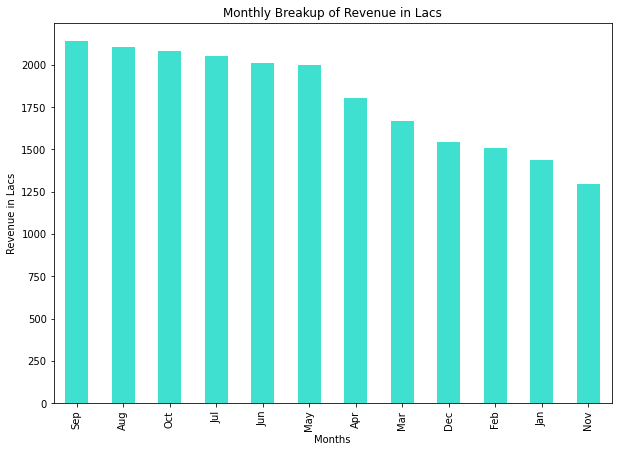

In [52]:
#Monthly breakup of revenue in Lacs

monthly_revenues.plot(kind='bar', color='turquoise', figsize=(10,7))
plt.title("Monthly Breakup of Revenue in Lacs")
plt.ylabel("Revenue in Lacs")
plt.xlabel("Months")
plt.show()

In [53]:
yearly_revenues = (df_months_years.groupby(['JobCard_Year'])['Total Amt Wtd Tax.'].sum().sort_values())/100000

In [54]:
yearly_revenues

JobCard_Year
2012    897.98
2013   2342.78
2014   4016.75
2015   6047.34
2016   8332.27
Name: Total Amt Wtd Tax., dtype: float64

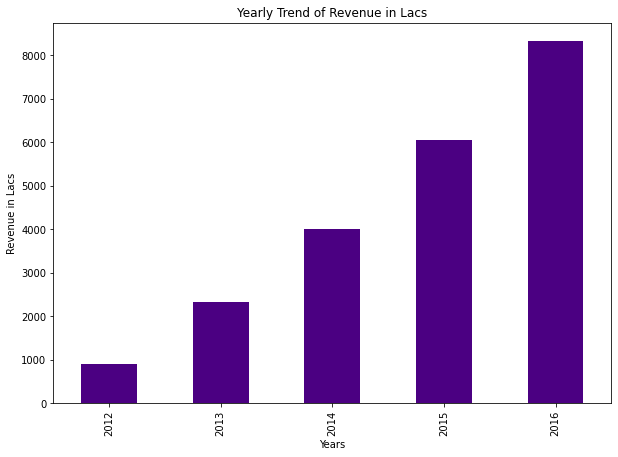

In [55]:
# Yearly Trend of Revenue in Lacs

yearly_revenues.plot(kind='bar', color='indigo', figsize=(10,7))
plt.title("Yearly Trend of Revenue in Lacs")
plt.ylabel("Revenue in Lacs")
plt.xlabel("Years")
plt.show()

## Highly demanded Spare Parts


In [56]:
#Loading the JTDdata set

JTD_data =pd.read_csv("JTD.csv")
JTD_data.reset_index(drop=True, inplace=True)

JTD_data.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.20,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.00,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.00,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.00,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.00,EA,10691.63


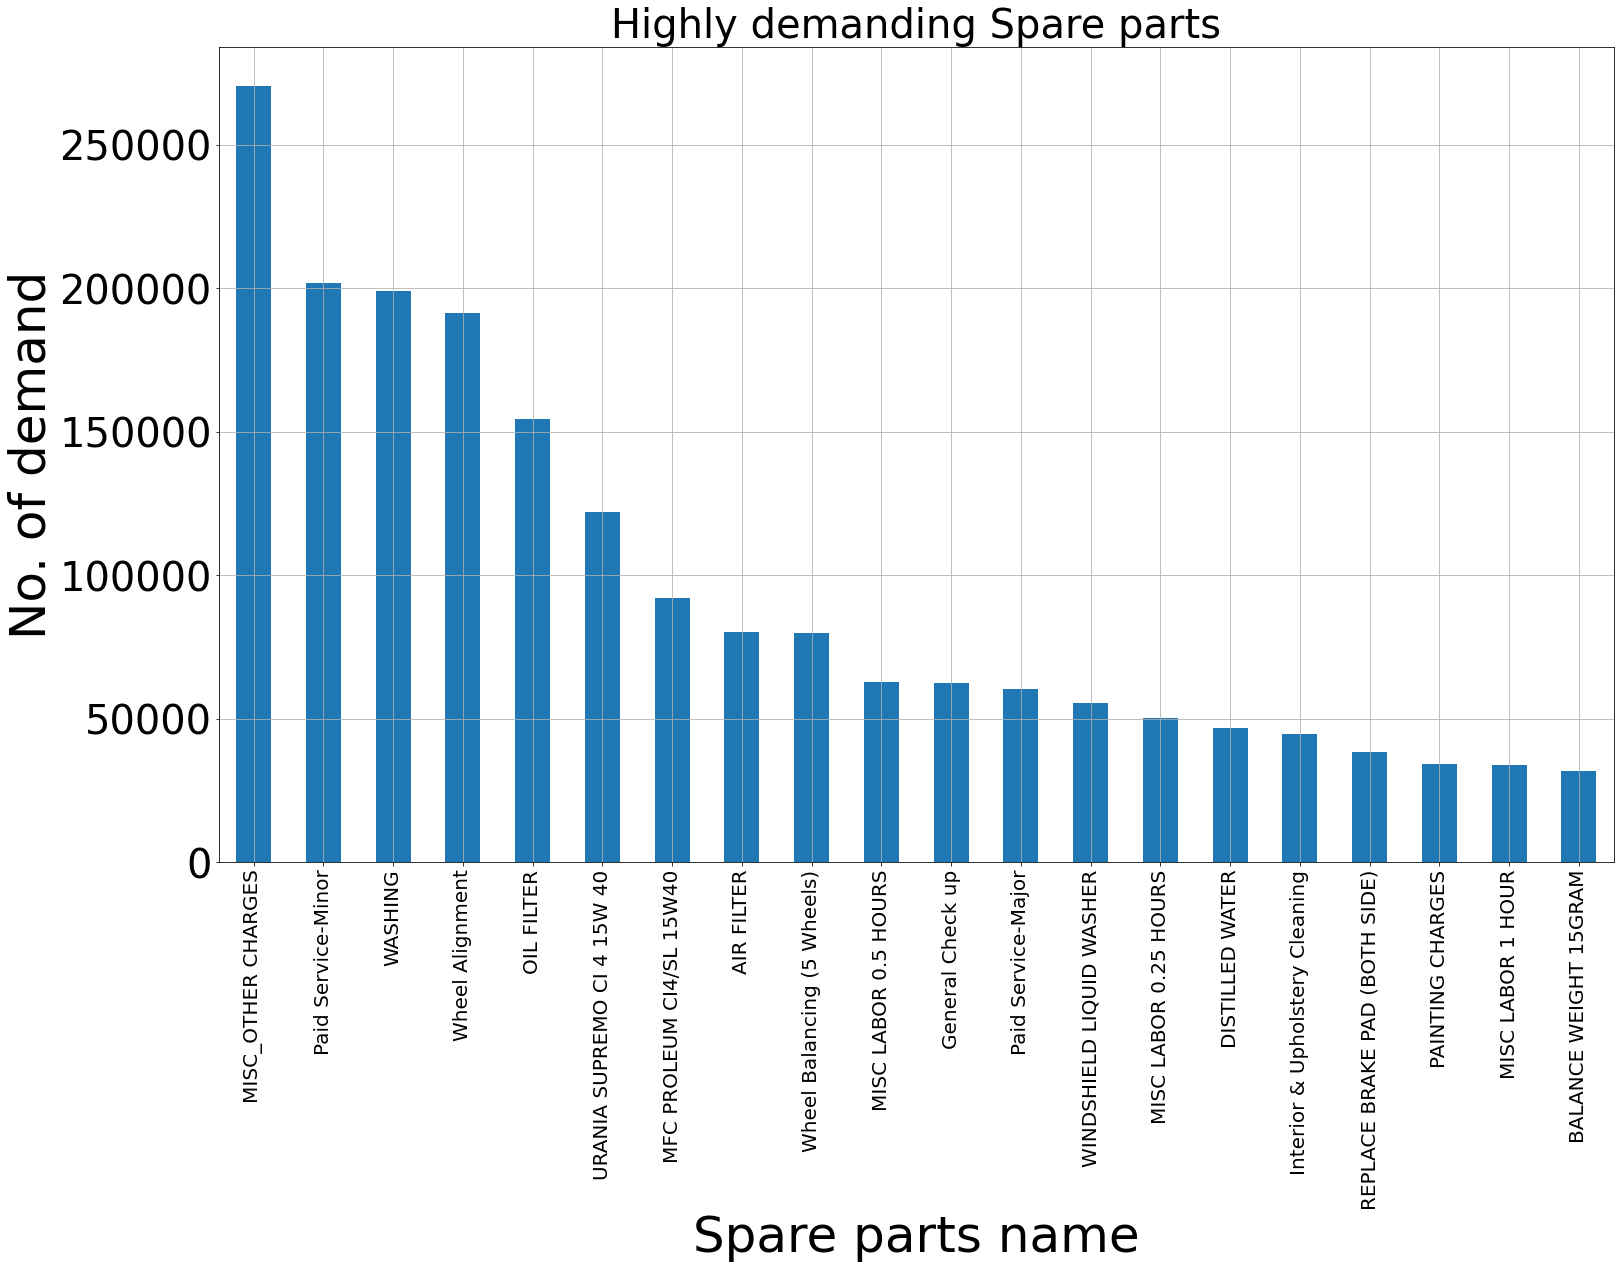

In [57]:
#Highly demanding Spare parts

plot = JTD_data['Description'].value_counts()[0:20].plot(kind='bar', figsize=(25,15))
plt.title("Highly demanding Spare parts",size=40)
plt.xticks(fontsize =20 , rotation=90)
plt.yticks(fontsize =40 )
plt.xlabel('Spare parts name', fontsize=50)
plt.ylabel('No. of demand', fontsize=50)
plt.grid(True)

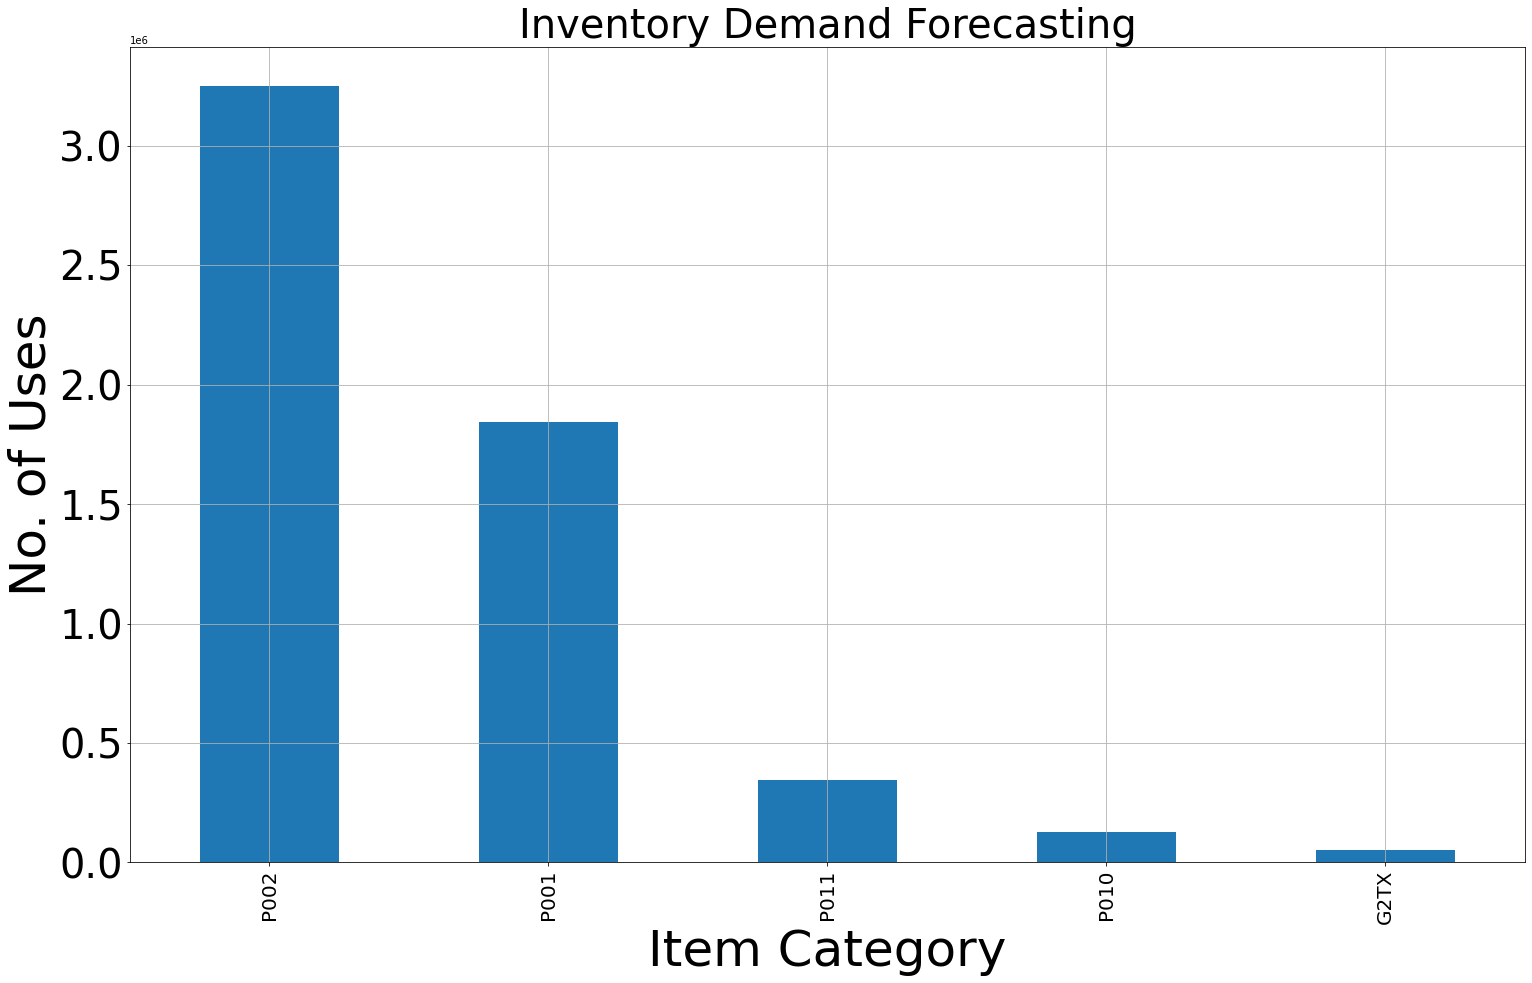

In [58]:
#Inventory Demand Forecasting

Inventory = JTD_data['Item Category'].value_counts().plot(kind='bar', figsize=(25,15))
plt.title("Inventory Demand Forecasting",size=40)
plt.xticks(fontsize =20 , rotation=90)
plt.yticks(fontsize =40 )
plt.xlabel('Item Category', fontsize=50)
plt.ylabel('No. of Uses', fontsize=50)
plt.grid(True)

## Insight : Inventory Management for seasonal requirement

### Seasonal Requirement study

Here we are studying the seasonal requirements. It’s clearly visible that the demand of the services is more in May to September.  

### Recommendation:

* 1.	If we go in more details for these 6 months, we saw that September, August and October are most revenue generating months. It means after the rains people tend to take the services more, so supply chain of the materials and man power management should be planned properly as per the demand in these months.
* 2.	From November to February the demand of services is significantly less. Some Year-end offers or Seasons’ end sale can be offered to customers to increase the revenue of these months.
* 3.	In study of state-wise demand of services are we can see Tamilnadu has highest demand in running repairs, then paid services and accidental. Maharashtra and Andhra Pradesh are after that and demand pattern is similar.
* 4.	From Item category we can see that item P002 has highest demand followed by P001, P011 and P010. Supply of these items should be planned properly. 


### 7. Top Insurance Companies

In [59]:
df_insurance = df.copy()
df_insurance.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service Time,Service Hour
0,0,0.00,0.00,MAJIWADA,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7005200002.00,500.06,Paid Service,0.00,2348.75,400601,BC01,THANE,NaN,NO,0.00,KA19MA1291,0.00,0.00,0.00,0.00,nan,0.00,RUPESH,4051.95,0.00,0.00,0.00,0.00,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,477
1,1,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7005200003.00,0.00,SMC Value Package,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,PRASHANT,1001.29,0.00,0.00,0.00,0.00,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,19
2,2,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7005200004.00,0.00,Running Repairs,0.00,52.95,400607,BC01,THANE,NaN,NO,0.00,AP09AX0582,0.00,0.00,0.00,0.00,nan,0.00,IMRAN,233.14,0.00,0.00,0.00,0.00,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,23
3,3,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7005200005.00,0.00,SMC Redemption,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,PRASHANT,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,1
4,4,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7005200006.00,499.99,Paid Service,0.00,944.16,400603,BC01,THANE,NaN,NO,0.00,MH04CD9768,0.00,0.00,0.00,0.00,nan,0.00,DAYANAND,2747.12,0.00,0.00,0.00,0.00,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,25


In [60]:
df_insurance['Insurance Company'].dropna(inplace=True)

In [61]:
df_insurance['Insurance Company'].unique()

array(['UNITED INDIA INSURANCE CO. LTD',
       'RELIANCE GENERAL INSURANCE COMPANY',
       'BHARTI AXA GENRERAL INSURANCE', 'Oriental Insurance Company Ltd.',
       'NATIONAL INSURANCE COMPANY LIMITED',
       'THE NEW INDIA ASSURANCE CO. LTD.', 'ICICI LOMBARD CUSTOMER DUES',
       'IFFCOTOKIO GENERAL INSURANCE',
       'Future Generali India Ins. Co Ltd',
       'BAJAJ ALLIANZE GENERAL INSURANCE CO',
       'SBI General Insurance Company Ltd.', 'HDFC ERGO',
       'TATA AIG GENERAL INSURANCE CO. LTD.',
       'CHOLAMANDALAM GENERAL INSURANCE CO.', 'L&T INSURANCE',
       'ROYAL SUNDARAM GENERAL', 'LIBERTY VIDEOCON GENERAL INSURANCE',
       'UNIVERSAL SOMPO GENERAL INSURANCE C',
       'Magma HDI General Insurance Co Ltd',
       'Kotak Mahindra General Insurance Lt',
       'Corporate Warranties India Pvt. Ltd'], dtype=object)

In [62]:
df_insurance.shape

(492314, 63)

In [63]:
df_insurance['Customer No.'].nunique()

253484

In [64]:
df_insurance.groupby(['Insurance Company'])['Customer No.'].nunique().sum()

15684

In [65]:
insurance = df_insurance.groupby(['Insurance Company'])['Customer No.'].nunique().sort_values(ascending=False)
insurance

Insurance Company
THE NEW INDIA ASSURANCE CO. LTD.       3750
NATIONAL INSURANCE COMPANY LIMITED     2227
UNITED INDIA INSURANCE CO. LTD         1615
RELIANCE GENERAL INSURANCE COMPANY     1184
ICICI LOMBARD CUSTOMER DUES            1076
Oriental Insurance Company Ltd.         826
BHARTI AXA GENRERAL INSURANCE           750
BAJAJ ALLIANZE GENERAL INSURANCE CO     652
UNIVERSAL SOMPO GENERAL INSURANCE C     523
IFFCOTOKIO GENERAL INSURANCE            520
TATA AIG GENERAL INSURANCE CO. LTD.     498
HDFC ERGO                               480
CHOLAMANDALAM GENERAL INSURANCE CO.     416
ROYAL SUNDARAM GENERAL                  301
Future Generali India Ins. Co Ltd       282
SBI General Insurance Company Ltd.      224
L&T INSURANCE                           149
Magma HDI General Insurance Co Ltd       69
Kotak Mahindra General Insurance Lt      51
Corporate Warranties India Pvt. Ltd      50
LIBERTY VIDEOCON GENERAL INSURANCE       41
Name: Customer No., dtype: int64

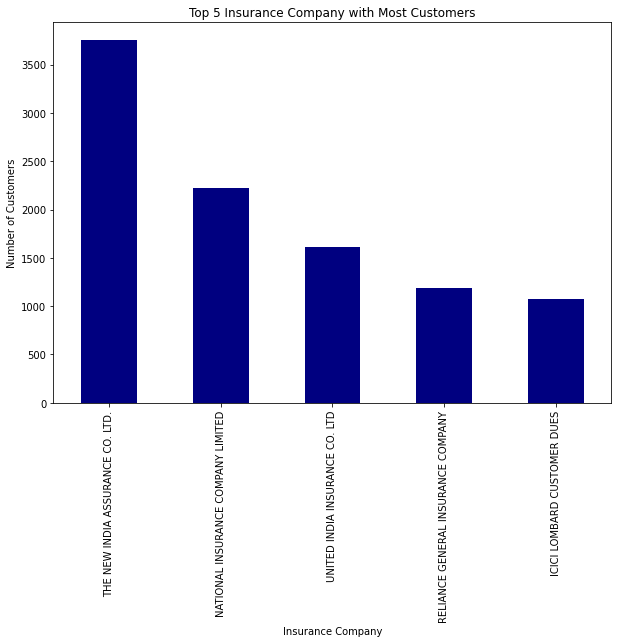

In [66]:
# Top 5 Insurance Comapnies with most no. customers

insurance.head(5).plot(kind='bar', color='Navy', figsize=(10,7))
plt.title("Top 5 Insurance Company with Most Customers")
plt.ylabel("Number of Customers")
plt.xlabel("Insurance Company")
plt.show()

## Insight : Top Insurance Companies

* 1. Chart shows the Top 5 insurance companies having the most customers.

* 2. However, before it is important to note that the total customer incoming are more than 253K whereas total customer availing insurance is around 15.5K which is about only 6% of the total customer base.

* 3. Hence special business actions for these customers may not justify the overall costs.

In [67]:
df_invoice = pd.read_csv("Final_invoice.csv",low_memory=False)

In [68]:
df_invoice['Invoice_DateTime'] = pd.to_datetime(df_invoice['Invoice Date'] + ' ' + df_invoice['Invoice Time'])
df_invoice['JobCard_DateTime'] = pd.to_datetime(df_invoice['JobCard Date'] + ' ' + df_invoice['JobCard Time'])
df_invoice['Service Time']=df_invoice['Invoice_DateTime'].sub(df_invoice['JobCard_DateTime'], axis=0)
df_invoice['Service Hour'] = df_invoice['Service Time'].apply(lambda x:(x.days * 24 + round(x.seconds /3600)))
# df_invoice['Service Hour']

## Service Time of top 20 plants/states

Text(0, 0.5, 'Plants')

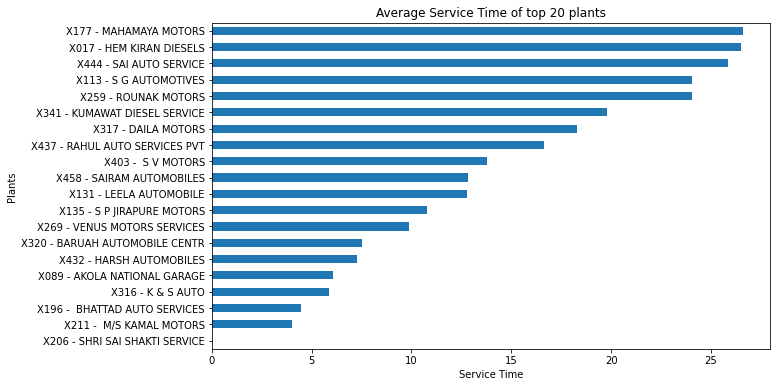

In [69]:

plt.figure(figsize=(10,6))
df_invoice.groupby('Plant Name1')['Service Hour'].mean().sort_values(ascending=True).head(20).plot(kind='barh')
plt.title('Average Service Time of top 20 plants')
plt.xlabel('Service Time')
plt.ylabel('Plants')

Text(0, 0.5, 'States')

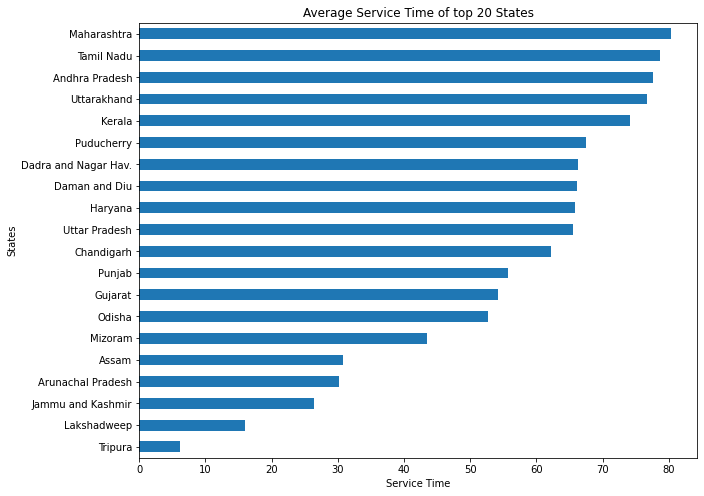

In [70]:

df_invoice['month'] = df_invoice['JobCard_DateTime'].dt.month
df_invoice['year'] = df_invoice['JobCard_DateTime'].dt.year
plt.figure(figsize=(10,8))
df_invoice.groupby('District')['Service Hour'].agg('mean').sort_values(ascending=True).head(20).plot(kind='barh')
plt.title('Average Service Time of top 20 States')
plt.xlabel('Service Time')
plt.ylabel('States')


## Service hour in Make and model?

<AxesSubplot:ylabel='Make'>

<Figure size 720x432 with 0 Axes>

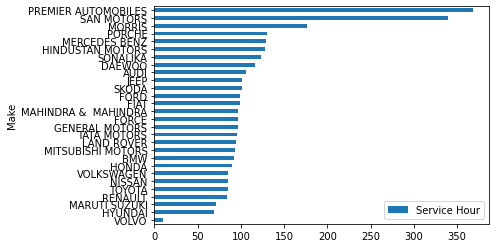

In [71]:
plt.figure(figsize=(10,6))
df_invoice.groupby('Make')[['Service Hour']].mean().sort_values(by='Service Hour',ascending=True).plot(kind='barh')

<AxesSubplot:xlabel='Model'>

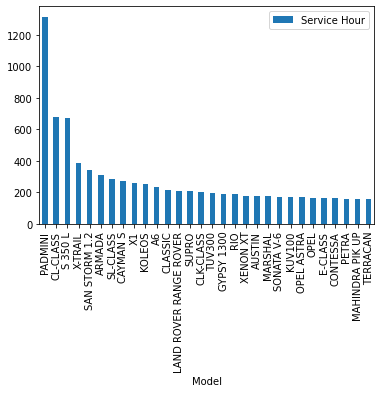

In [72]:

df_invoice.groupby('Model')[['Service Hour']].mean().sort_values(by='Service Hour',ascending=False).head(30).plot(kind='bar')

<AxesSubplot:xlabel='Order Type'>

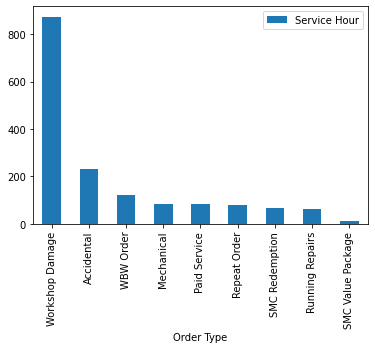

In [73]:

df_invoice.groupby('Order Type')[['Service Hour']].mean().sort_values(by='Service Hour',ascending=False).head(30).plot(kind='bar')

In [74]:

df_invoice.groupby(['Order Type','Make'])[['Service Hour']].mean().sort_values(by=['Service Hour'],ascending=False)#.plot(kind='bar')


Service Hour
Order Type        Make                              
Accidental        PREMIER AUTOMOBILES        3572.50
Workshop Damage   HYUNDAI                    1361.20
                  MARUTI SUZUKI              1133.80
Paid Service      SAN MOTORS                 1081.50
Mechanical        JEEP                        558.00
...                                              ...
SMC Redemption    DAEWOO                        2.00
Accidental        JEEP                          2.00
Repeat Order      HINDUSTAN MOTORS              1.00
SMC Value Package DAEWOO                        0.50
WBW Order         MAHINDRA &  MAHINDRA          0.00

[161 rows x 1 columns]

## Statewise care make service hour

In [75]:
district_make = df_invoice.groupby(['District','Make'])[['Service Hour']].mean().sort_values(by=['District','Service Hour'],ascending=False)#.plot(kind='bar')
district_make

Service Hour
District             Make                              
West Bengal          SONALIKA                    260.50
                     HINDUSTAN MOTORS            192.75
                     TATA MOTORS                 175.93
                     MAHINDRA &  MAHINDRA        170.61
                     HYUNDAI                     166.33
...                                                 ...
Andhra Pradesh       VOLVO                        10.25
Andaman and Nico.In. TOYOTA                      513.50
                     MAHINDRA &  MAHINDRA        151.33
                     FIAT                        124.00
                     MARUTI SUZUKI                 0.00

[534 rows x 1 columns]

TypeError: 'AxesSubplot' object is not subscriptable

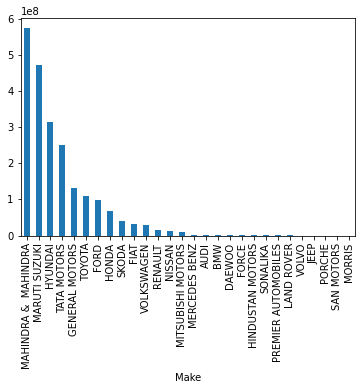

In [76]:

insurance = df_invoice.groupby('Make')['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).plot(kind='bar')[df_invoice['Insurance Company'].notnull()]
insurance.groupby('Make')['Job Card No'].count().sort_values(ascending=False).plot(kind='bar')

### Linking JTD and Invoice data set

In [77]:
df_invoice['year'] = pd.DatetimeIndex(df_invoice['Invoice Date']).year

In [78]:
X = df_invoice.groupby(['year','District'])['Total Value'].sum()

In [79]:
df_invoice['Plant'].unique()
for year in range(2012,2017):
    print(year,X[(year)].idxmax(), X[(year)].max())

2012 Maharashtra 35829340.30000032
2013 Maharashtra 70711798.19000037
2014 Maharashtra 105330310.49999954
2015 Tamil Nadu 181551245.00999245
2016 Andaman and Nico.In. 0.0


In [80]:
#df_invoice['Total Days'] = df_invoice['JobCard Date'].sub(df_invoice['Invoice Date'], axis=0)
#df_invoice['Invoice Date'].astype(int)
df_invoice['Invoice Date'] = pd.to_datetime(df_invoice['Invoice Date'],dayfirst=True)
df_invoice['JobCard Date'] = pd.to_datetime(df_invoice['JobCard Date'],dayfirst=True)
df_invoice['Invoice Date'] = df_invoice['Invoice Date'].replace("-", "")
df_invoice['JobCard Date'] = df_invoice['JobCard Date'].replace("-", "")
df_invoice['Invoice Date'].head()


0   2015-01-02
1   2015-01-03
2   2015-01-03
3   2015-01-03
4   2015-01-03
Name: Invoice Date, dtype: datetime64[ns]

In [81]:
df_invoice['Total Days'] = (df_invoice['JobCard Date'] - df_invoice['Invoice Date']).dt.days
df_invoice['Total Days'] = df_invoice['Total Days'].abs()
df_invoice['Total Days'].head()


0    20
1     1
2     1
3     0
4     1
Name: Total Days, dtype: int64

In [82]:
df_invoice['Time_Diff'] = pd.to_datetime(df_invoice['JobCard Time']) - pd.to_datetime(df_invoice['Invoice Time'])

## Total time taken by car in servicing

In [83]:

df_invoice['Time_Diff'] 

0                 02:59:07
1                 04:04:46
2                 00:27:47
3        -1 days +22:31:48
4        -1 days +22:38:25
                ...       
492309   -1 days +18:18:14
492310   -1 days +17:35:23
492311   -1 days +16:43:55
492312   -1 days +20:54:49
492313   -1 days +23:44:47
Name: Time_Diff, Length: 492314, dtype: timedelta64[ns]

In [84]:
cust_data = pd.read_excel("Customer_Data.xlsx")
plant_data = pd.read_excel("Plant Master.xlsx")

In [85]:
#data set merging
customer_invoice_df = pd.merge(df_invoice,cust_data,left_on='Customer No.',right_on='Customer No.',how='inner')
plant_invoice_df = pd.merge(df_invoice,plant_data,left_on='Plant',right_on='Plant',how='inner')

In [86]:
plant_invoice_df.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service Time,Service Hour,month,year,Total Days,Time_Diff,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,1738,0.00,0.00,.,0.00,0.00,0.00,0.00,AMNJIKARAI,NaN,NaN,Retail,84249,Tamil Nadu,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-01,7011200000,13:28:22,173683,2014-12-31,15:14:43,50548,548.81,MAHINDRA & MAHINDRA,99.97,XYLO,7011200000.00,0.00,Running Repairs,0.00,0.00,600029,BC07,NERKUNDRAM,NaN,NO,0.00,TN02AH4343,0.00,0.00,0.00,0.00,nan,0.00,ARUN,648.78,0.00,0.00,0.00,0.00,648.78,BC07SA2,2015-01-01 13:28:22,2014-12-31 15:14:43,0 days 22:13:39,22,12,2015,1,01:46:21,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.00,600107,Chennai,MFCS,Tamil Nadu
1,1739,0.00,0.00,CHENNAI,0.00,0.00,0.00,0.00,MANAVALA NGR,NaN,NaN,Retail,84304,Tamil Nadu,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-02,7011200001,11:36:41,173803,2015-01-01,13:39:39,75806,489.50,GENERAL MOTORS,0.00,BEAT,7011200001.00,0.00,Running Repairs,0.00,0.00,600036,BC07,NERKUNDRAM,NaN,NO,0.00,KA03MM7097,0.00,0.00,0.00,0.00,nan,0.00,VISHWA,489.50,0.00,0.00,0.00,0.00,489.50,BC07SA1,2015-01-02 11:36:41,2015-01-01 13:39:39,0 days 21:57:02,22,1,2015,1,02:02:58,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.00,600107,Chennai,MFCS,Tamil Nadu
2,1740,0.00,0.00,VANAGARAM,0.00,0.00,0.00,0.00,CHENNAI,NaN,NaN,Retail,84267,Tamil Nadu,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-02,7011200002,11:38:02,173724,2014-12-31,17:00:47,138565,0.01,TOYOTA,99.63,INNOVA,7011200002.00,0.00,Paid Service,0.00,0.00,600060,BC07,NERKUNDRAM,NaN,NO,0.00,TN09AV1357,0.00,0.00,0.00,0.00,nan,0.00,saravanan,99.64,0.00,0.00,0.00,0.00,99.64,BC07SA1,2015-01-02 11:38:02,2014-12-31 17:00:47,1 days 18:37:15,43,12,2015,2,05:22:45,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.00,600107,Chennai,MFCS,Tamil Nadu
3,1741,0.00,0.00,GAJA LAKSHMI NAGAR,0.00,0.00,0.00,0.00,MADURAVOYALO,NaN,NaN,Retail,84381,Tamil Nadu,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-02,7011200003,12:19:23,173944,2015-01-02,12:13:09,51485,0.00,MAHINDRA & MAHINDRA,750.30,LOGAN D,7011200003.00,0.00,Running Repairs,0.00,0.00,600017,BC07,NERKUNDRAM,NaN,NO,0.00,TN07AM7990,0.00,0.00,0.00,0.00,nan,0.00,VISWA,750.30,0.00,0.00,0.00,0.00,750.30,BC07SA1,2015-01-02 12:19:23,2015-01-02 12:13:09,0 days 00:06:14,0,1,2015,0,-1 days +23:53:46,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.00,600107,Chennai,MFCS,Tamil Nadu
4,1742,0.00,0.00,CHENNAI,0.00,0.00,0.00,0.00,"MOUNT ROAD, NEAR LIC",NaN,NaN,Retail,69956,Tamil Nadu,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7011200004,14:53:48,174227,2015-01-03,12:00:23,64999,0.01,MARUTI SUZUKI,299.91,800,7011200004.00,0.00,Paid Service,0.00,0.00,600002,BC07,NERKUNDRAM,NaN,NO,0.00,TN10C1900,0.00,0.00,0.00,0.00,nan,0.00,SARAVANAN,299.92,0.00,0.00,0.00,0.00,299.92,BC07SA1,2015-01-03 14:53:48,2015-01-03 12:00:23,0 days 02:53:25,3,1,2015,0,-1 days +21:06:35,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.00,600107,Chennai,MFCS,Tamil Nadu


In [87]:
customer_invoice_df.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service Time,Service Hour,month,year,Total Days,Time_Diff,Business Partner,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,20,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,E12734,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200022,19:40:26,174232,2015-01-03,11:34:27,53311,1845.00,MARUTI SUZUKI,50.00,ALTO,7005200022.00,0.00,Paid Service,0.00,1562.27,400607,BC01,THANE,NaN,NO,0.00,MH43V1363,0.00,0.00,0.00,0.00,nan,0.00,RUPESH,3457.27,0.00,0.00,0.00,0.00,3457.27,BC01SA1,2015-01-03 19:40:26,2015-01-03 11:34:27,0 days 08:05:59,8,1,2015,0,-1 days +15:54:01,E12734,1.00,Z001,nan,nan,nan,NaN,NaT
1,605805,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,E12734,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2014-06-18,7000122741,18:46:39,123388,2014-06-16,20:55:25,45588,1317.37,MARUTI SUZUKI,50.00,ALTO,7000122741.00,0.00,Paid Service,0.00,2159.64,400607,BC01,THANE,NaN,NO,0.00,MH43V1363,0.00,0.00,0.00,0.00,nan,0.00,harshad,3527.01,0.00,0.00,0.00,0.00,3527.01,BC01SA2,2014-06-18 18:46:39,2014-06-16 20:55:25,1 days 21:51:14,46,6,2014,2,02:08:46,E12734,1.00,Z001,nan,nan,nan,NaN,NaT
2,654559,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,E12734,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2014-12-30,7000174274,13:36:15,171517,2014-12-25,11:35:20,53099,0.00,MARUTI SUZUKI,0.00,ALTO,7000174274.00,0.00,Paid Service,0.00,0.00,400607,BC01,THANE,NaN,NO,0.00,MH43V1363,0.00,0.00,0.00,0.00,nan,0.00,DAYANAND,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA1,2014-12-30 13:36:15,2014-12-25 11:35:20,5 days 02:00:55,122,12,2014,5,-1 days +21:59:05,E12734,1.00,Z001,nan,nan,nan,NaN,NaT
3,658125,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,E12734,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-05-22,7000002754,17:02:25,1547,2012-04-28,10:54:20,25905,825.15,MARUTI SUZUKI,50.01,ALTO,7000002754.00,0.00,Paid Service,0.00,1297.52,400607,BC01,THANE,NaN,NO,0.00,MH43V1363,0.00,0.00,0.00,0.00,nan,0.00,NaN,2172.68,0.00,0.00,0.00,0.00,2172.68,BC01SA1,2012-05-22 17:02:25,2012-04-28 10:54:20,24 days 06:08:05,582,4,2012,24,-1 days +17:51:55,E12734,1.00,Z001,nan,nan,nan,NaN,NaT
4,664223,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,E12734,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-08-25,7000008998,12:35:07,9071,2012-08-25,11:10:19,29173,0.00,MARUTI SUZUKI,0.00,ALTO,7000008998.00,0.00,Running Repairs,0.00,293.33,400607,BC01,THANE,NaN,NO,0.00,MH43V1363,0.00,0.00,0.00,0.00,nan,0.00,NaN,293.33,0.00,0.00,0.00,0.00,293.33,BC01SA1,2012-08-25 12:35:07,2012-08-25 11:10:19,0 days 01:24:48,1,8,2012,0,-1 days +22:35:12,E12734,1.00,Z001,nan,nan,nan,NaN,NaT


<AxesSubplot:xlabel='District'>

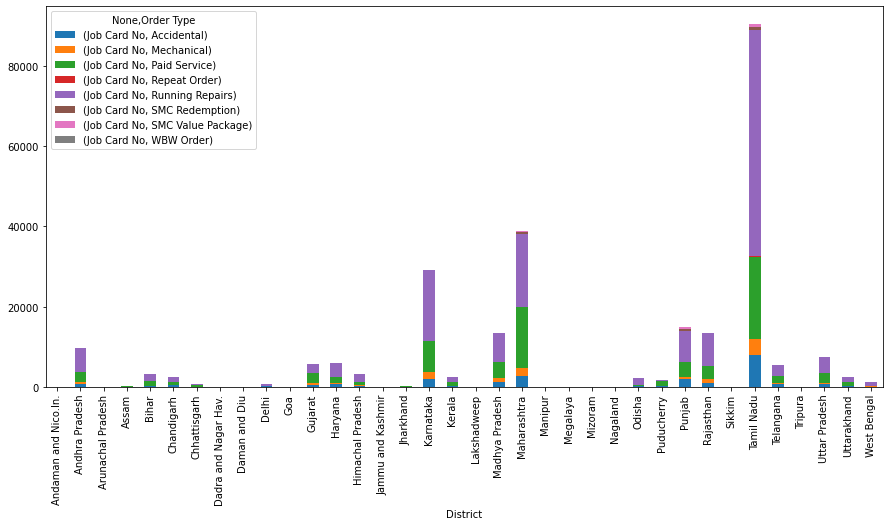

In [88]:
fig, ax = plt.subplots(figsize=(15,7))
plant_invoice_df.groupby(['District','Order Type'])[['Job Card No']].count().sort_values(by=['District','Job Card No'],ascending=False).unstack().plot(kind='bar',stacked=True, ax=ax)


### TECHNICIAN

Text(0, 0.5, 'Total Labour Income (Rs. )')

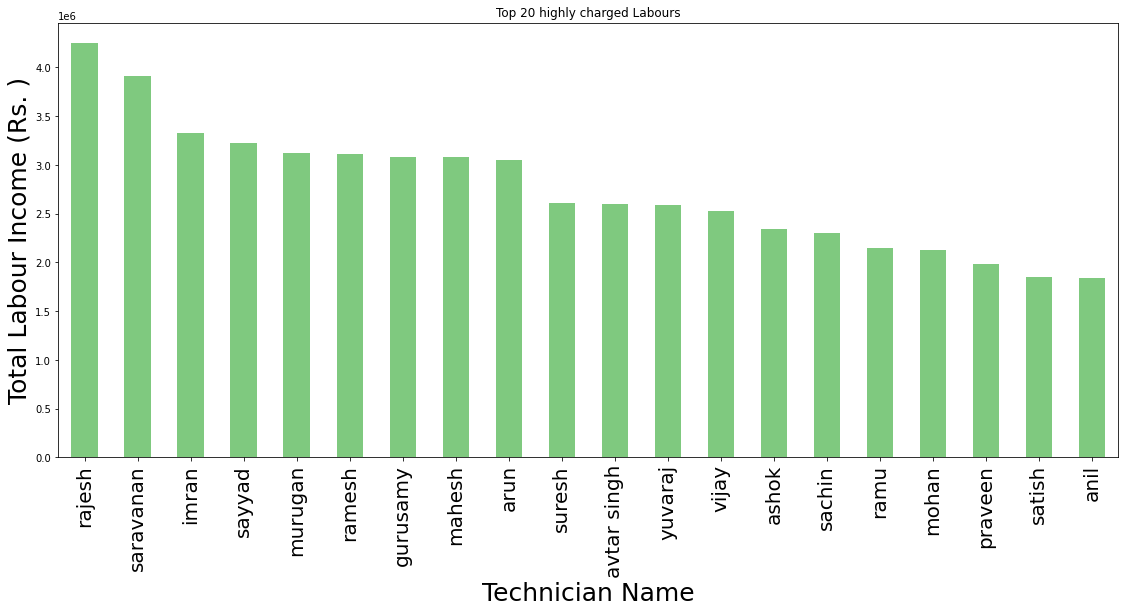

In [89]:

plt.figure(figsize=(19,8))
df_invoice['Technician Name'] = df_invoice['Technician Name'].str.lower()
labour_charge = df_invoice.groupby('Technician Name')['Labour Total'].sum().sort_values(ascending=False)
labour_charge[:20].plot(x= labour_charge.index, y = labour_charge, kind = 'bar', colormap = 'Accent');
plt.xticks(fontsize =20 , rotation=90)
plt.title('Top 20 highly charged Labours')
plt.xlabel('Technician Name', fontsize=25)
plt.ylabel('Total Labour Income (Rs. )', fontsize=25)

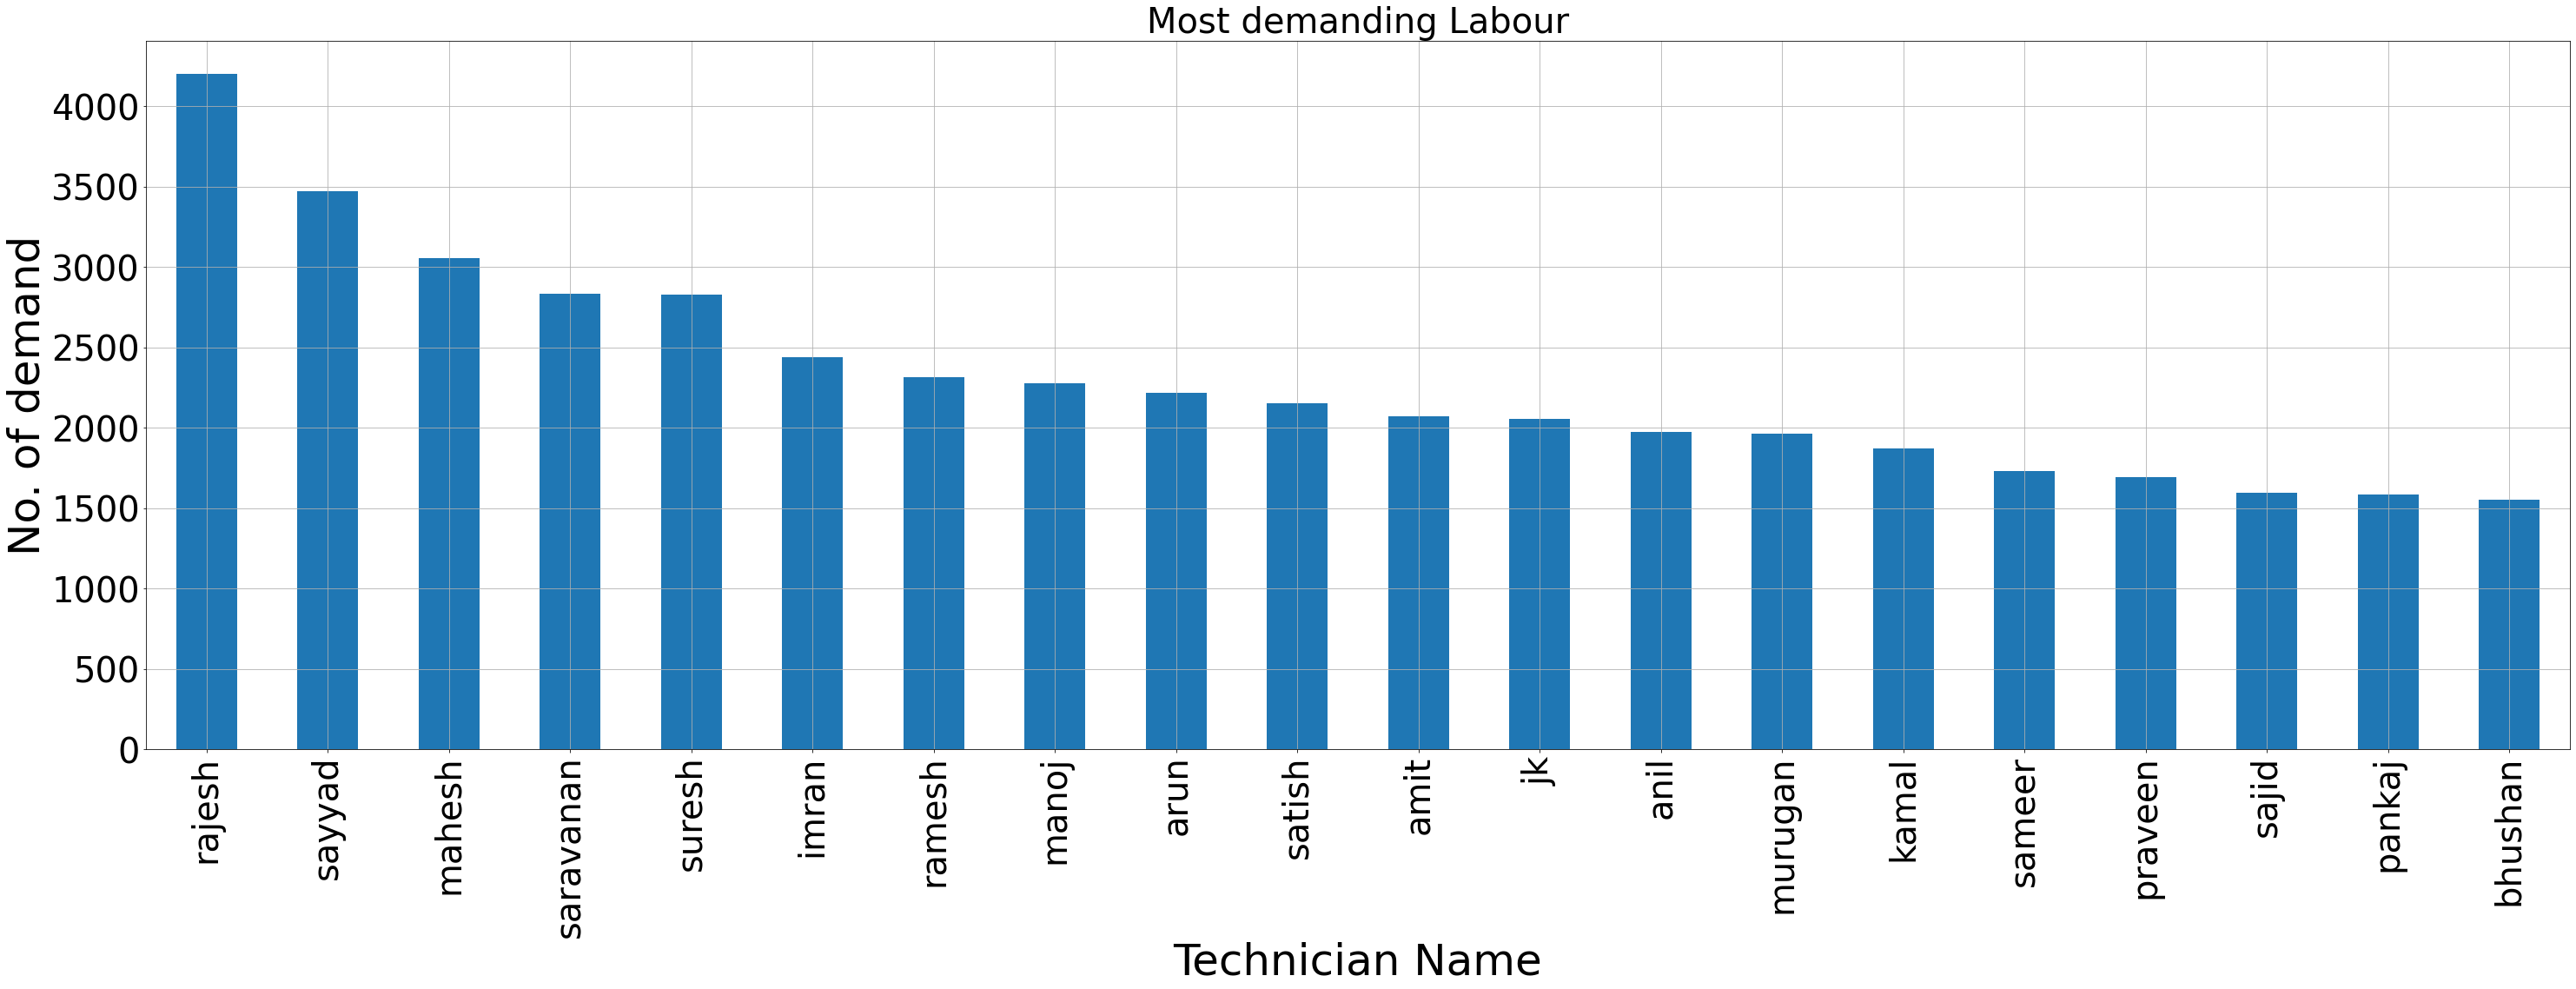

In [90]:
labour = df_invoice['Technician Name'].value_counts() 
plot = labour[:20].plot(kind='bar',figsize=(50,15))
plt.title("Most demanding Labour",size=40)
plt.xticks(fontsize =40 , rotation=90)
plt.yticks(fontsize =40 )
plt.xlabel('Technician Name', fontsize=50)
plt.ylabel('No. of demand', fontsize=50)
plt.grid(True)

In [91]:
df_invoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service Time,Service Hour,month,year,Total Days,Time_Diff
0,0,0.00,0.00,MAJIWADA,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7005200002.00,500.06,Paid Service,0.00,2348.75,400601,BC01,THANE,NaN,NO,0.00,KA19MA1291,0.00,0.00,0.00,0.00,nan,0.00,rupesh,4051.95,0.00,0.00,0.00,0.00,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,477,12,2015,20,02:59:07
1,1,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7005200003.00,0.00,SMC Value Package,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,prashant,1001.29,0.00,0.00,0.00,0.00,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,20,1,2015,1,04:04:46
2,2,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7005200004.00,0.00,Running Repairs,0.00,52.95,400607,BC01,THANE,NaN,NO,0.00,AP09AX0582,0.00,0.00,0.00,0.00,nan,0.00,imran,233.14,0.00,0.00,0.00,0.00,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,24,1,2015,1,00:27:47
3,3,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7005200005.00,0.00,SMC Redemption,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,prashant,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,1,1,2015,0,-1 days +22:31:48
4,4,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7005200006.00,499.99,Paid Service,0.00,944.16,400603,BC01,THANE,NaN,NO,0.00,MH04CD9768,0.00,0.00,0.00,0.00,nan,0.00,dayanand,2747.12,0.00,0.00,0.00,0.00,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,25,1,2015,1,-1 days +22:38:25


# STATEWISE NUMBER OF SERVICE STATION

https://public.tableau.com/app/profile/khan.adil/viz/capstone1_16228787359680/Sheet7

# how much avg time require for each order type?

In [92]:
df.groupby('Order Type')['Service Hour'].mean().sort_values(ascending=False)

Order Type
Workshop Damage     873.35
Accidental          229.98
WBW Order           121.24
Mechanical           85.00
Paid Service         84.22
Repeat Order         78.48
SMC Redemption       64.52
Running Repairs      61.80
SMC Value Package    10.47
Name: Service Hour, dtype: float64

Text(0, 0.5, 'Order Type')

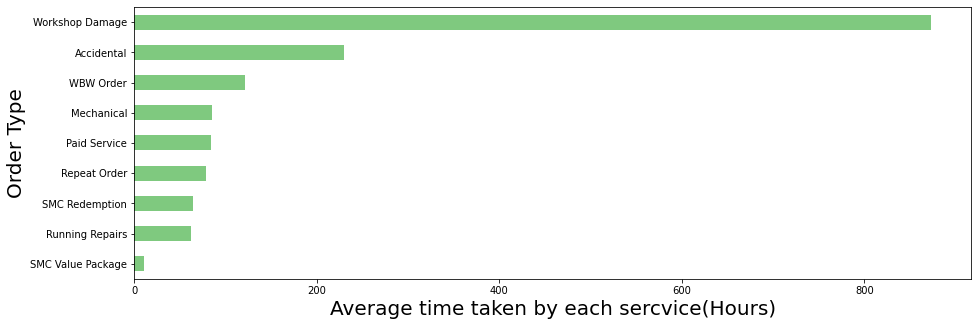

In [93]:
plt.figure(figsize=(15,5))
df.groupby('Order Type')['Service Hour'].mean().sort_values(ascending=True).plot(kind='barh',colormap = 'Accent')
plt.xlabel('Average time taken by each sercvice(Hours)', fontsize=20)
plt.ylabel('Order Type', fontsize=20)

<AxesSubplot:xlabel='Order Type', ylabel='Service Hour'>

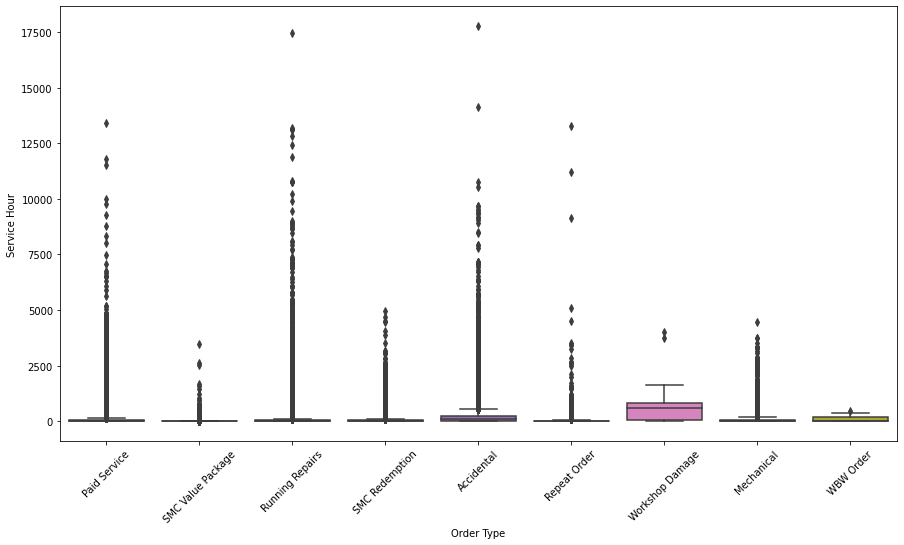

In [94]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Order Type', 'Service Hour', data=df)

##### THE END